RMSE
R2
MAE

## Collecting the Data 

In [1]:
import pandas as pd

df_train = pd.read_csv('../data/train_data_stg.csv', delimiter='|')

df_test = pd.read_csv('../data/test_data_stg.csv', delimiter='|')

In [2]:
df_train.head()

,rank,t,p
0,1,11662839.55,7622.0
1,2,1931166.67,1164.0
2,3,78411667.44,432896.0
3,4,2274540.32,10046.0
4,5,2113766.13,1962.0


In [3]:
df_test.head()

,rank,t,p
0,25,32625522.00,25408.0
1,30,9678145.70,68264.0
2,53,3453252.19,3437.0
3,65,2727246.97,12729.0
4,66,1161085.64,2417.0


In [4]:
df_train = df_train.drop(['rank'], axis=1)


df_test = df_test.drop(['rank'], axis=1)


In [5]:
df_train.head()

,t,p
0,11662839.55,7622.0
1,1931166.67,1164.0
2,78411667.44,432896.0
3,2274540.32,10046.0
4,2113766.13,1962.0


In [6]:
df_test.head()

,t,p
0,32625522.00,25408.0
1,9678145.70,68264.0
2,3453252.19,3437.0
3,2727246.97,12729.0
4,1161085.64,2417.0


In [14]:
X_train = df_train.drop('p', axis=1).to_numpy().reshape(-1, 1)
Y_train = df_train['p'].copy().to_numpy().reshape(-1, 1)

X_test = df_test.drop('p', axis=1).to_numpy().reshape(-1, 1)
Y_test = df_test['p'].copy().to_numpy().reshape(-1,1)

In [20]:
from sklearn.preprocessing import StandardScaler

std_sclaler = StandardScaler()
X_test_scaled, Y_test_scaled = std_sclaler.fit_transform(X_test), std_sclaler.fit_transform(Y_test)
X_train_scaled, Y_train_scaled = std_sclaler.fit_transform(X_train), std_sclaler.fit_transform(Y_train)



In [21]:
from sklearn import linear_model

model = linear_model.LinearRegression()

# Train the model 
model.fit(X_train_scaled, Y_train_scaled)

# Test the model 
model_pred = model.predict(X_test_scaled)

In [24]:
model_pred

array([[ 0.02989253],
       [-0.03105754],
       [-0.04759136],
       ...,
       [-0.05582693],
       [-0.05663933],
       [-0.05483641]])

In [22]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(Y_test_scaled, model_pred))
print("Root Mean Squarred Error (RMSE): %.2f" % root_mean_squared_error(Y_test_scaled, model_pred))
print("R2 Score %.2f" % r2_score(Y_test_scaled, model_pred))

Mean Absolute Error (MAE): 0.07
Root Mean Squarred Error (RMSE): 1.03
R2 Score -0.06


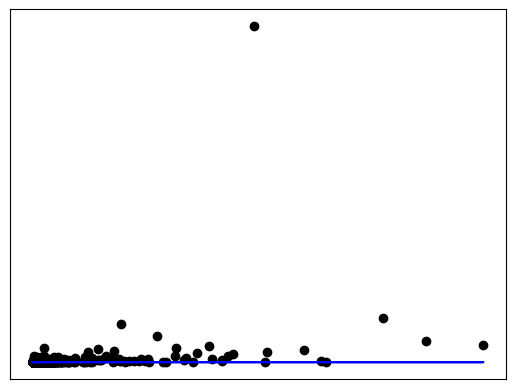

In [23]:
import matplotlib.pyplot as plt

plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, model_pred, color="blue")

plt.xticks(())
plt.yticks(())

plt.show()